In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('test_lAUu6dG.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df.shape

(367, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### Handle Missing Values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
(round((df.isnull().sum()/len(df))*100),2)

(Loan_ID              0.0
 Gender               3.0
 Married              0.0
 Dependents           3.0
 Education            0.0
 Self_Employed        6.0
 ApplicantIncome      0.0
 CoapplicantIncome    0.0
 LoanAmount           1.0
 Loan_Amount_Term     2.0
 Credit_History       8.0
 Property_Area        0.0
 dtype: float64,
 2)

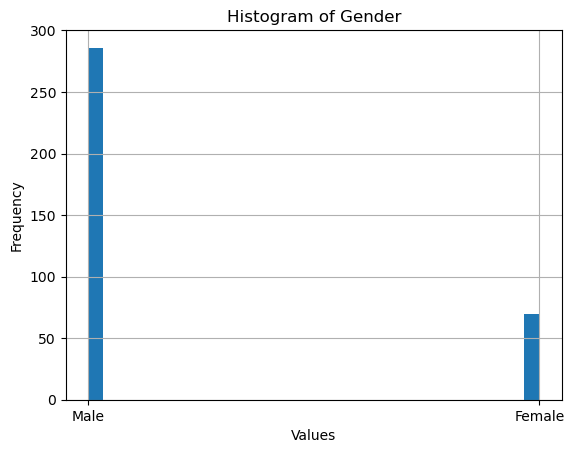

In [10]:
df['Gender'].hist(bins=30)
plt.title('Histogram of Gender')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [11]:
df['Gender'].value_counts(normalize=True)*100

Male      80.337079
Female    19.662921
Name: Gender, dtype: float64

In [12]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

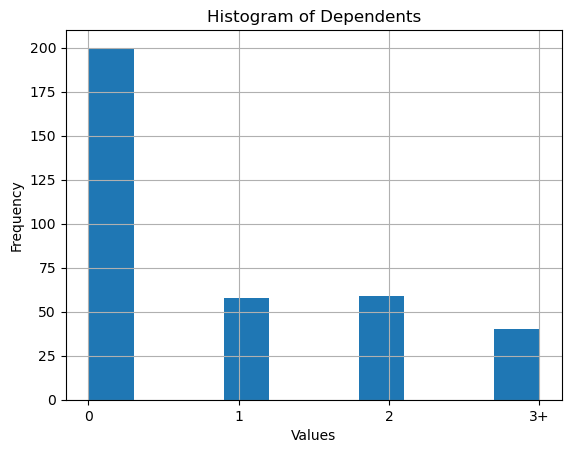

In [13]:
df['Dependents'].hist(bins=10)
plt.title('Histogram of Dependents')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [14]:
df['Dependents'].dtype

dtype('O')

In [15]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [16]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

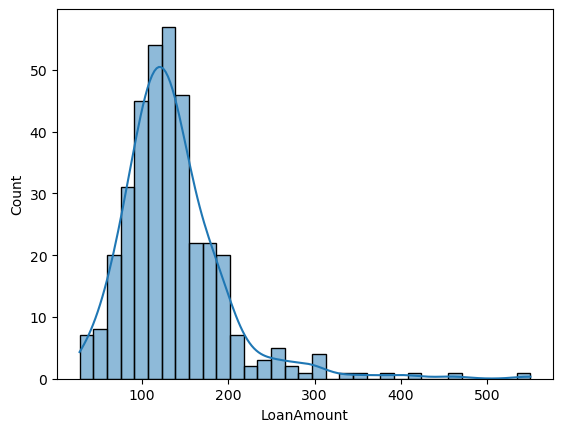

In [20]:
sns.histplot(df['LoanAmount'], kde=True)
plt.show()

In [21]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

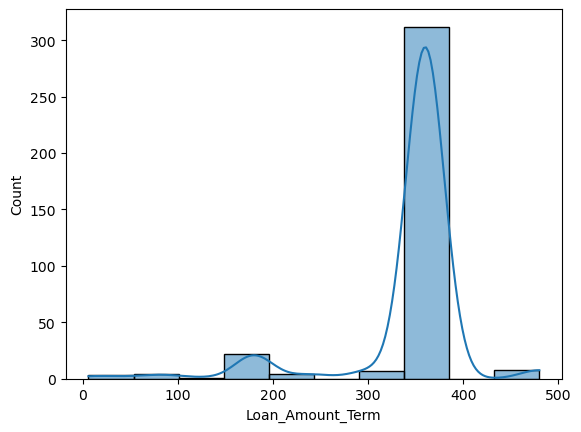

In [22]:
sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.show()

In [23]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

In [24]:
df['Credit_History'].unique()

array([ 1., nan,  0.])

In [25]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Detecting Duplicates

In [29]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
362    False
363    False
364    False
365    False
366    False
Length: 367, dtype: bool

### Detecting Outliers

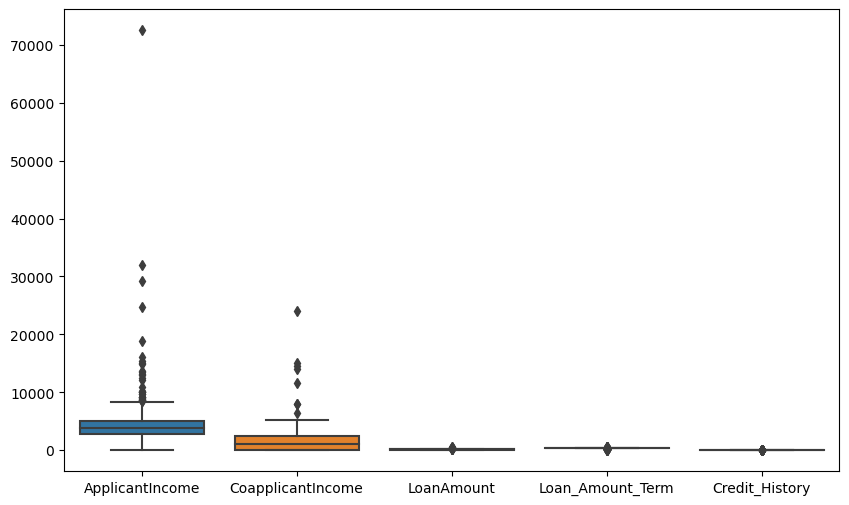

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=0)
plt.show()